In [53]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [54]:
match_df = pd.read_csv('../output/csv/lol-data-matches-fixed-duration.csv')
match_df = match_df.set_index('match_id')
# Remove Unnecessary Labels
match_df.drop(labels=['count','division','patch','region','first_rift_herald'], axis=1, inplace=True)

In [55]:
match_df.fillna(0, inplace=True)
match_df = match_df[match_df.winning_team!=0]
match_df.replace({
    'winning_team': {100: 1, 200: -1},
    'first_champion': {100: 1, 200: -1},
    'first_tower': {100: 1, 200: -1},
    'first_inhibitor': {100: 1, 200: -1},
    'first_baron': {100: 1, 200: -1},
    'first_dragon': {100: 1, 200: -1},
}, inplace=True)

match_df = match_df.astype({
    'winning_team': 'int32',
    'first_champion': 'int32',
    'first_tower': 'int32',
    'first_inhibitor': 'int32',
    'first_baron': 'int32',
    'first_dragon': 'int32',
})
match_df

,tier,game_duration,winning_team,first_champion,first_tower,first_inhibitor,first_baron,first_dragon
match_id,,,,,,,,
EUW1_5479661889,BRONZE,1797,1,1,1,1,1,1
EUW1_5479575964,BRONZE,1719,1,1,-1,1,0,1
EUW1_5479499524,BRONZE,1352,-1,-1,-1,-1,0,1
EUW1_5479492935,BRONZE,1647,-1,-1,1,-1,0,-1
EUW1_5479357161,BRONZE,1509,-1,-1,-1,-1,0,-1
...,...,...,...,...,...,...,...,...
EUW1_5544360421,GRANDMASTERS,1928,-1,1,-1,-1,-1,1
EUW1_5544335270,GRANDMASTERS,1101,-1,-1,-1,0,0,-1
EUW1_5544282724,GRANDMASTERS,1788,1,-1,1,1,1,-1


''

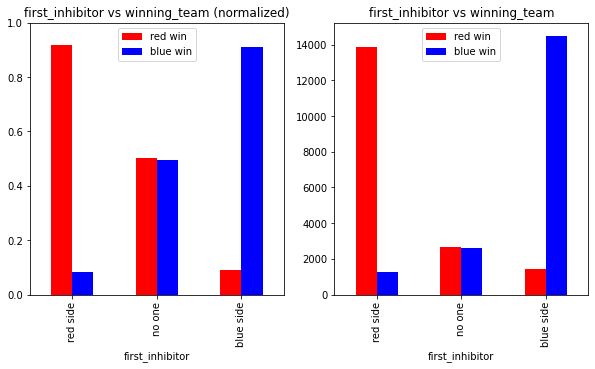

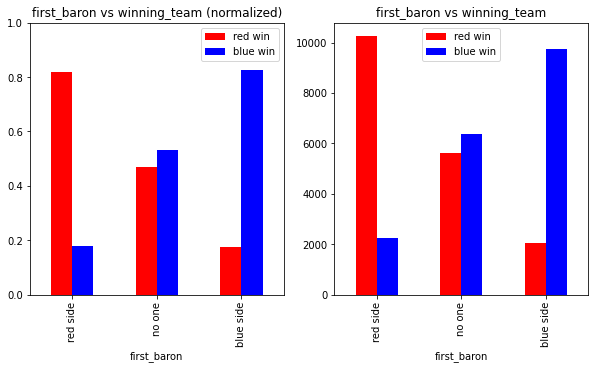

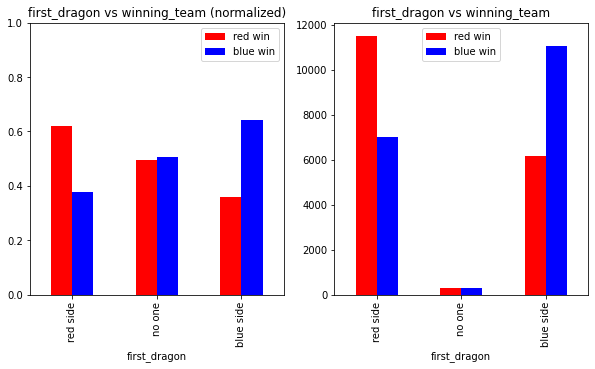

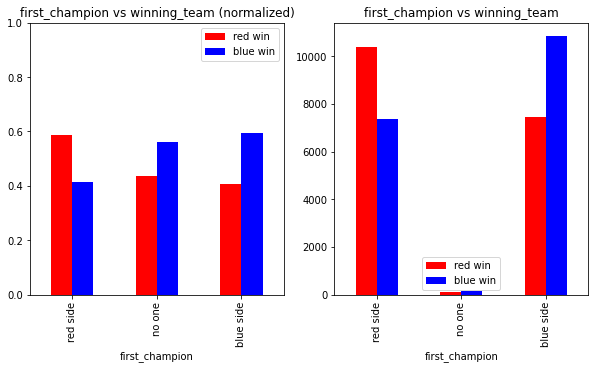

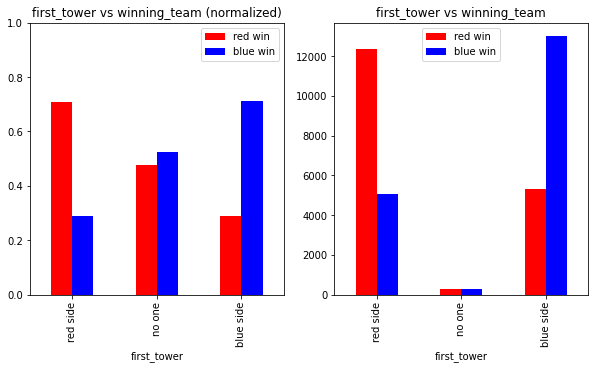

In [97]:
for feature in ['first_inhibitor', 'first_baron','first_dragon','first_champion','first_tower']:
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.set_title("%s vs winning_team (normalized)" % feature)
    
    ax1.set_ylim(0,1)
    pd.crosstab(match_df[feature], match_df['winning_team'],normalize='index').plot.bar( ax=ax1, color=['red','blue'])
    ax1.set_xticklabels(['red side', 'no one', 'blue side'])
    ax1.legend(['red win', 'blue win'])
    
    plt.subplot(1,2,2)
    pd.crosstab(match_df[feature], match_df['winning_team']).plot.bar(ax=ax2, color=['red','blue'])
    ax2.set_xticklabels(['red side', 'no one', 'blue side'])
    ax2.set_title("%s vs winning_team" % feature)
    ax2.legend(['red win', 'blue win'])
;


In [57]:
match_df[match_df.winning_team!=0]

,tier,game_duration,winning_team,first_champion,first_tower,first_inhibitor,first_baron,first_dragon
match_id,,,,,,,,
EUW1_5479661889,BRONZE,1797,1,1,1,1,1,1
EUW1_5479575964,BRONZE,1719,1,1,-1,1,0,1
EUW1_5479499524,BRONZE,1352,-1,-1,-1,-1,0,1
EUW1_5479492935,BRONZE,1647,-1,-1,1,-1,0,-1
EUW1_5479357161,BRONZE,1509,-1,-1,-1,-1,0,-1
...,...,...,...,...,...,...,...,...
EUW1_5544360421,GRANDMASTERS,1928,-1,1,-1,-1,-1,1
EUW1_5544335270,GRANDMASTERS,1101,-1,-1,-1,0,0,-1
EUW1_5544282724,GRANDMASTERS,1788,1,-1,1,1,1,-1
